# **Multilinear Regression CARS**

# Importing Libraries

In [63]:
# Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

# Needed Packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from patsy import dmatrices
from statsmodels.tools.tools import add_constant

%config InlineBackend.figure_format = 'retina'
sns.set()

# Importing Dataset

In [64]:
url = "https://raw.githubusercontent.com/arya289/cars/main/CARS.csv"
df = pd.read_csv(url)
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


# Inspecting Dataset

## Data Definition

- `Brand` : Brand of the car
- `Price` : Selling price of the car
- `Body` : Body type (sedan, van, crossover, etc.)
- `Mileage` : Sum of mileage of the car
- `EngineV` : Engine capacity
- `Engine Type 	` : Fuel type
- `Registration` : Registered vehicle or no 
- `Year` : Year built
- `Model` : The model of car

## Selecting Target Variable

Based on given dataset, after we inspect it we can conclude that the proper target variable would be `Price`. The reason was because `Price` variable would be dependent to the other variables. Any attributes from other variables would affecting the value of the `Price` varaible.

## First and Last Rows

In [65]:
df.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


In [66]:
df.tail(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
4335,BMW,27900.0,sedan,38,2.0,Petrol,yes,2013,320
4336,Renault,2100.0,vagon,237,1.9,Diesel,no,2001,Laguna
4337,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013,T5 (Transporter)


## Data Dimension

In [67]:
df.shape

(4345, 9)

In total, there are 9 columns with 4,345 observations. We will need to filter the columns, since we might not going to use all of them in prediction model.

## Data Type & Null Values

In [68]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [69]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

As we can see, there are 5 categorical variables and 4 numerical variables. Also, there are some missing values from the dataset. Unfortunately, some of the missing values are in our target variable (`Price`). Therefore, we will need to remove the missing values first, otherwise we will not able to predict the `Price` variable. 

In [70]:
df_c = df.dropna()
df_c.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [71]:
df_c.shape

(4025, 9)

The obersvations are reduced into 4,025 right now.

## Describe Numerical Values

In [72]:
df_c.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


- In the `Price` variable, there is a big variance between the minimum and maximum value. And looking by the percentile data, we are expecting a distribution with long tail.
- In the `Mileage` variable, the minimum value is 0. It means that some of cars were new, but some of them were used cars.
- In the `EngineV` variable, there is something really odd. Commonly, the passanger car engine capacity is below 5.0 L. But in the data, we can see that the maximum engine capacity is 99.99 L. It surely needs a cleaning process.
- In the `Year` variable, there is also big variance between the minimum and maximum year value. We will need to see the histogram to get a better look of the distribution.   

In [73]:
#Filter Car Engine with > 6.0 L Capacity
df_c.loc[df['EngineV'] > 5.0].shape

(122, 9)

There are 81 observations that have odd engine capacity. Since the number is not so big, we will take them out from the observations.

In [74]:
df_c = df_c.loc[df['EngineV'] <= 5.0]
df_c.shape

(3903, 9)

## Describe Categorical Values

In [75]:
df_c.describe(exclude=[np.number])

,Brand,Body,Engine Type,Registration,Model
count,3903,3903,3903,3903,3903
unique,7,6,4,2,288
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,875,1477,1853,3538,187


In [76]:
print (df_c['Brand'].unique())

['BMW' 'Mercedes-Benz' 'Audi' 'Toyota' 'Renault' 'Volkswagen' 'Mitsubishi']


In [77]:
print (df_c['Body'].unique())

['sedan' 'van' 'crossover' 'vagon' 'other' 'hatch']


In [78]:
print (df_c['Engine Type'].unique())

['Petrol' 'Diesel' 'Gas' 'Other']


In [79]:
print (df_c['Registration'].unique())

['yes' 'no']


In [80]:
print (df_c['Model'].unique())

['320' 'Sprinter 212' 'S 500' 'Q7' 'Rav 4' 'A6' 'Megane' 'Golf IV' '19'
 'A6 Allroad' 'Passat B6' 'Land Cruiser 100' 'Clio' '318' 'Hilux' 'Polo'
 'Outlander' 'A8' 'Touareg' 'Vito' 'Colt' '100' 'Z4' 'Pajero Wagon' 'X5'
 'Caddy' 'Camry' '528' 'TT' 'X6' 'Galant' '525' 'Kangoo' 'ML 350' '730'
 'Trafic' 'X5 M' 'S 350' 'Lancer' 'E-Class' 'Scenic' '330' 'Passat B5'
 'A3' 'Land Cruiser Prado' 'Caravelle' 'Avensis' 'GL 320' 'GL 450'
 'Lancer X' '200' '520' 'Tiguan' 'Outlander XL' 'GLS 350' 'A5' 'X6 M'
 'Golf III' 'A 150' 'FJ Cruiser' 'Koleos' 'Land Cruiser 200' 'Passat B7'
 'Scirocco' 'M5' 'Venza' '80' 'V 250' 'ML 270' 'C-Class' 'Lupo' '5 Series'
 'CLA 200' 'T5 (Transporter)' 'Highlander' 'Corolla' 'CLK 240' 'I3'
 'Multivan' 'Vaneo' 'X1' 'T5 (Transporter) ' 'S 400' 'Passat CC'
 'A4 Allroad' 'Passat B4' 'Golf II' 'L 200' 'Jetta' 'Logan' 'Pajero Sport'
 'Sprinter 312' 'Lancer X Sportback' 'Golf Plus' 'Up' 'Amarok' 'Passat B3'
 'G 320' 'Auris' '530' 'Master' 'Dokker' '540' 'ML 320' 'Golf VI'
 'Gol

Based on our observation to the catgeorical variables, the `Model` consists of so many values, which will not going to be useful for us in the next process. Therefore, we will drop it.

In [81]:
#Drop the Model variable
df_c = df_c.drop(columns=['Model'])

# Exploratory Data Analysis

## Correlation Analysis

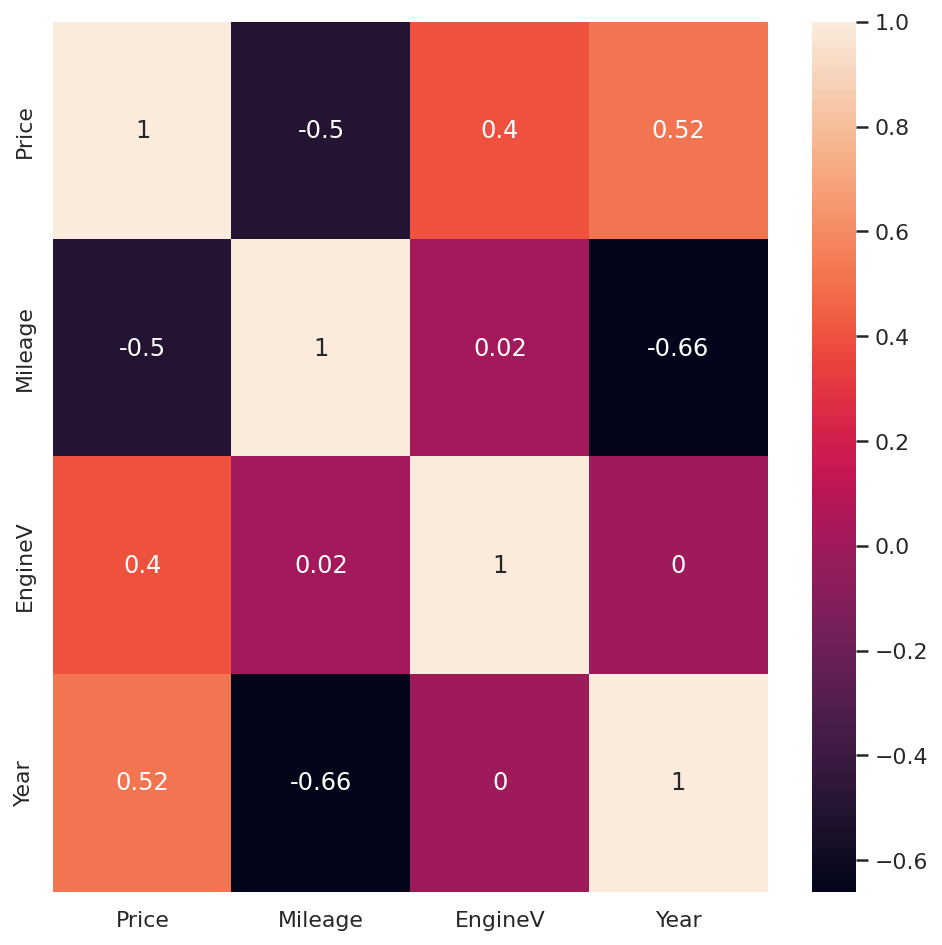

In [82]:
sns.set(rc={'figure.figsize':(8,8)})
matrix = df_c.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

By looking at the correlation matrix, we could see that `Price` has quite strong positive correlation with the `Year` and `EngineV`, but also has quite strong negative correlatin with the `Mileage`. 

As for the predictor variables, it seems there is no very strong correlation among them (>0.7 or <-0.7). The one correlation which quite strong enough is between `Mileage` and `Year` which is makes sense because the older the vehicle usualy has more mileage. This low correlation may indicates there will be no multicollinearity issues.  

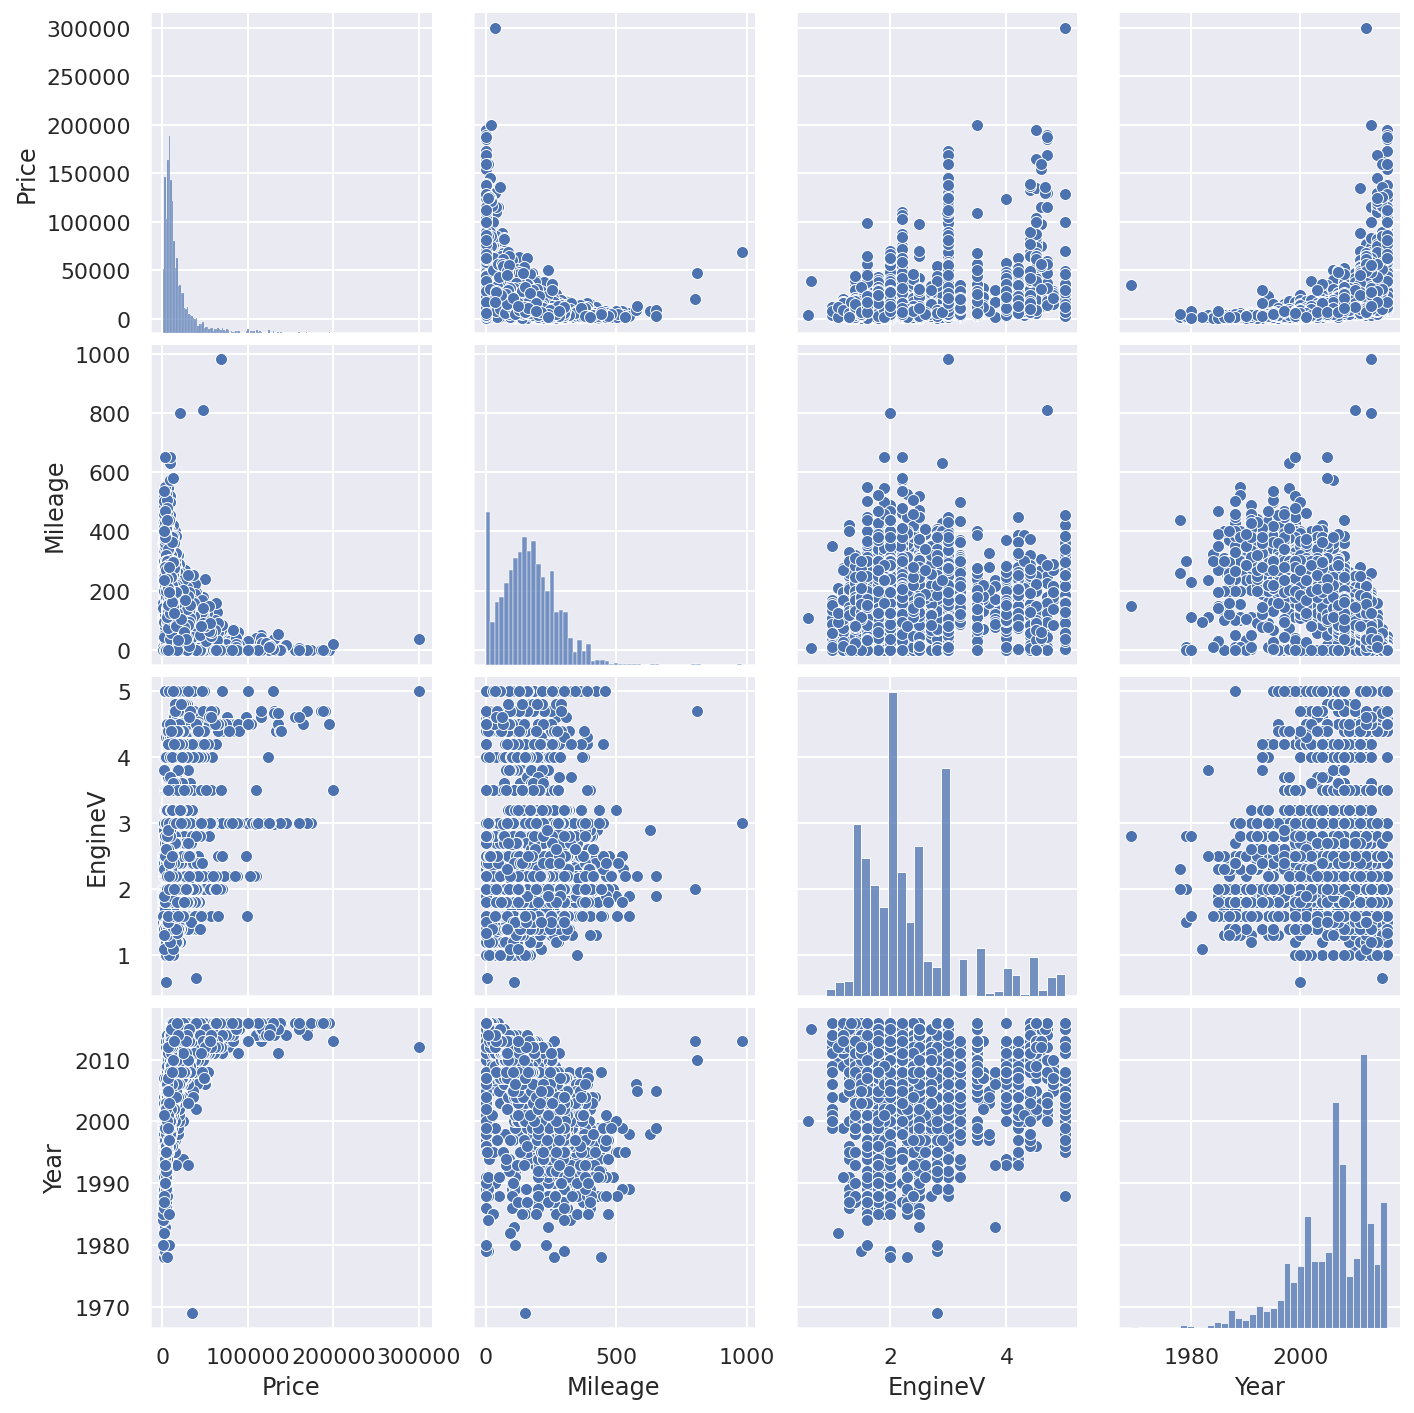

In [83]:
sns.pairplot(data=df_c)
plt.show()

- The Correlation pattern among all variables is quite random, and no strong correlation, just like mentioned before in correlation matrix.
- The distribution of `Price` variable, really showing strong positive skewness. It was quite reasonable since some of the cars are in new condition, which may resulting in high price.

## Distribution Analysis

### Price

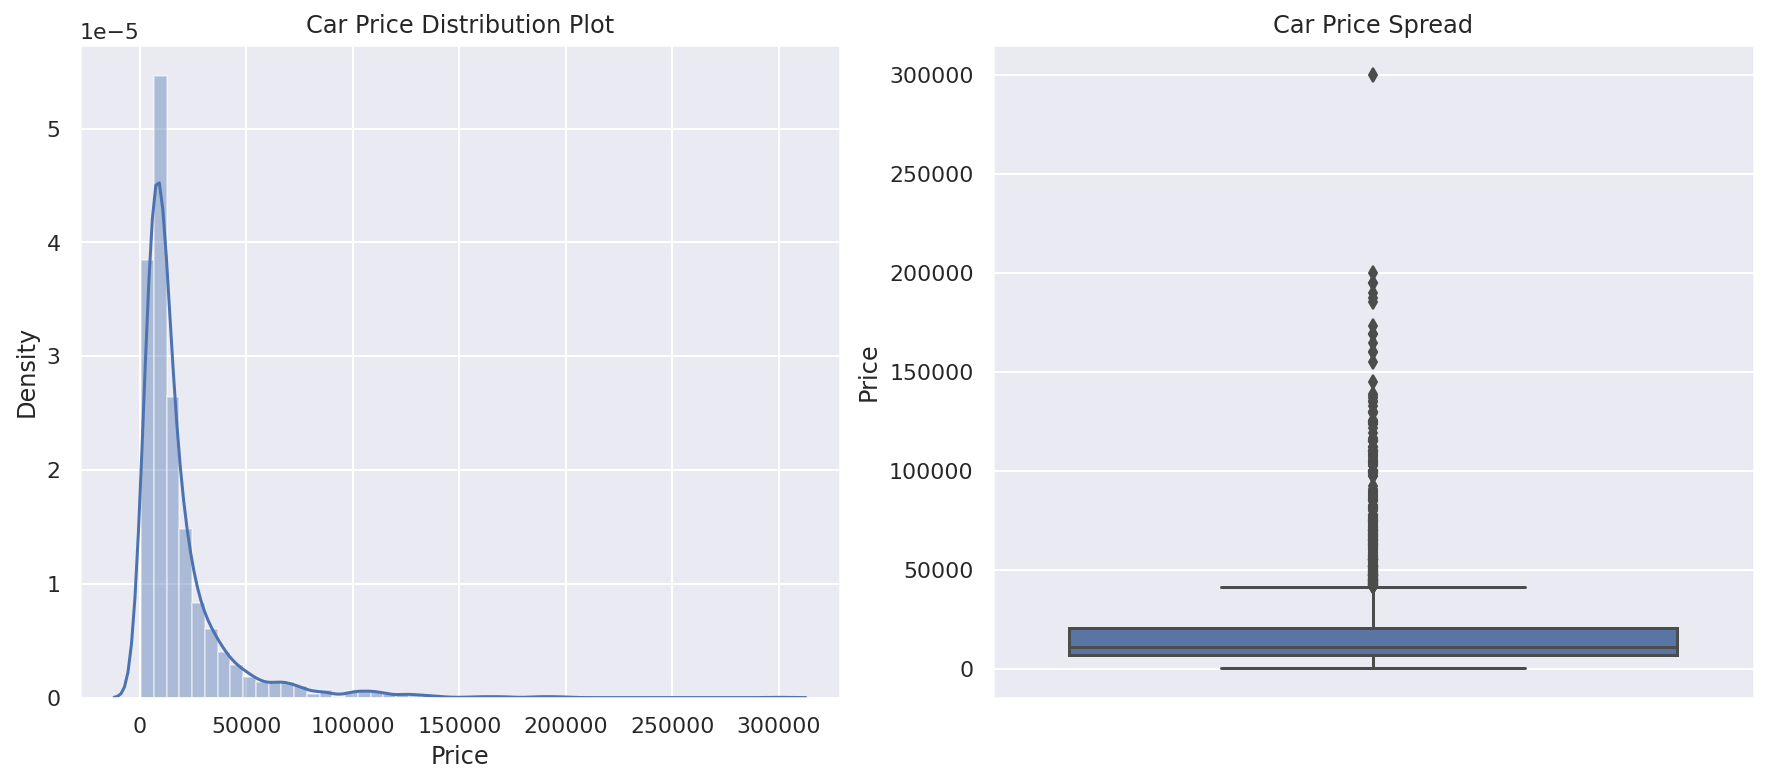

In [84]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df_c.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df_c.Price)

plt.show()

- The Price Target Variable have positively skewed distribution.
- There is also an outliers value on the price, but we will not remove it since it is an target variable

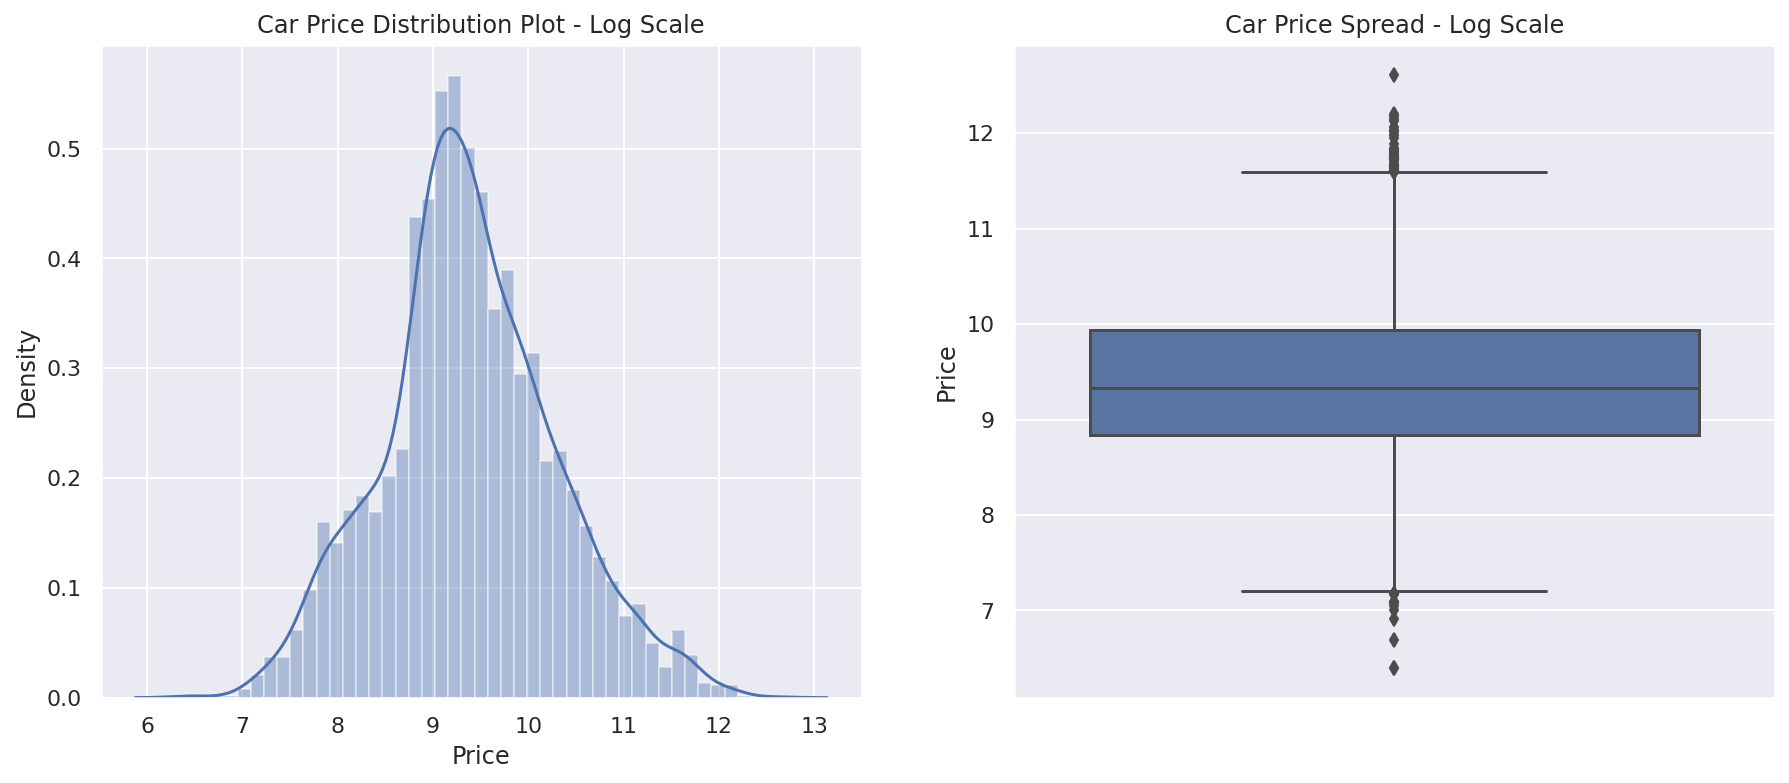

In [85]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot - Log Scale')
sns.distplot(np.log(df_c.Price))

plt.subplot(1,2,2)
plt.title('Car Price Spread - Log Scale')
sns.boxplot(y=np.log(df_c.Price))

plt.show()

- The Distribution of the Price after being scaled with log is normal, however,outliers still exists.

### Mileage

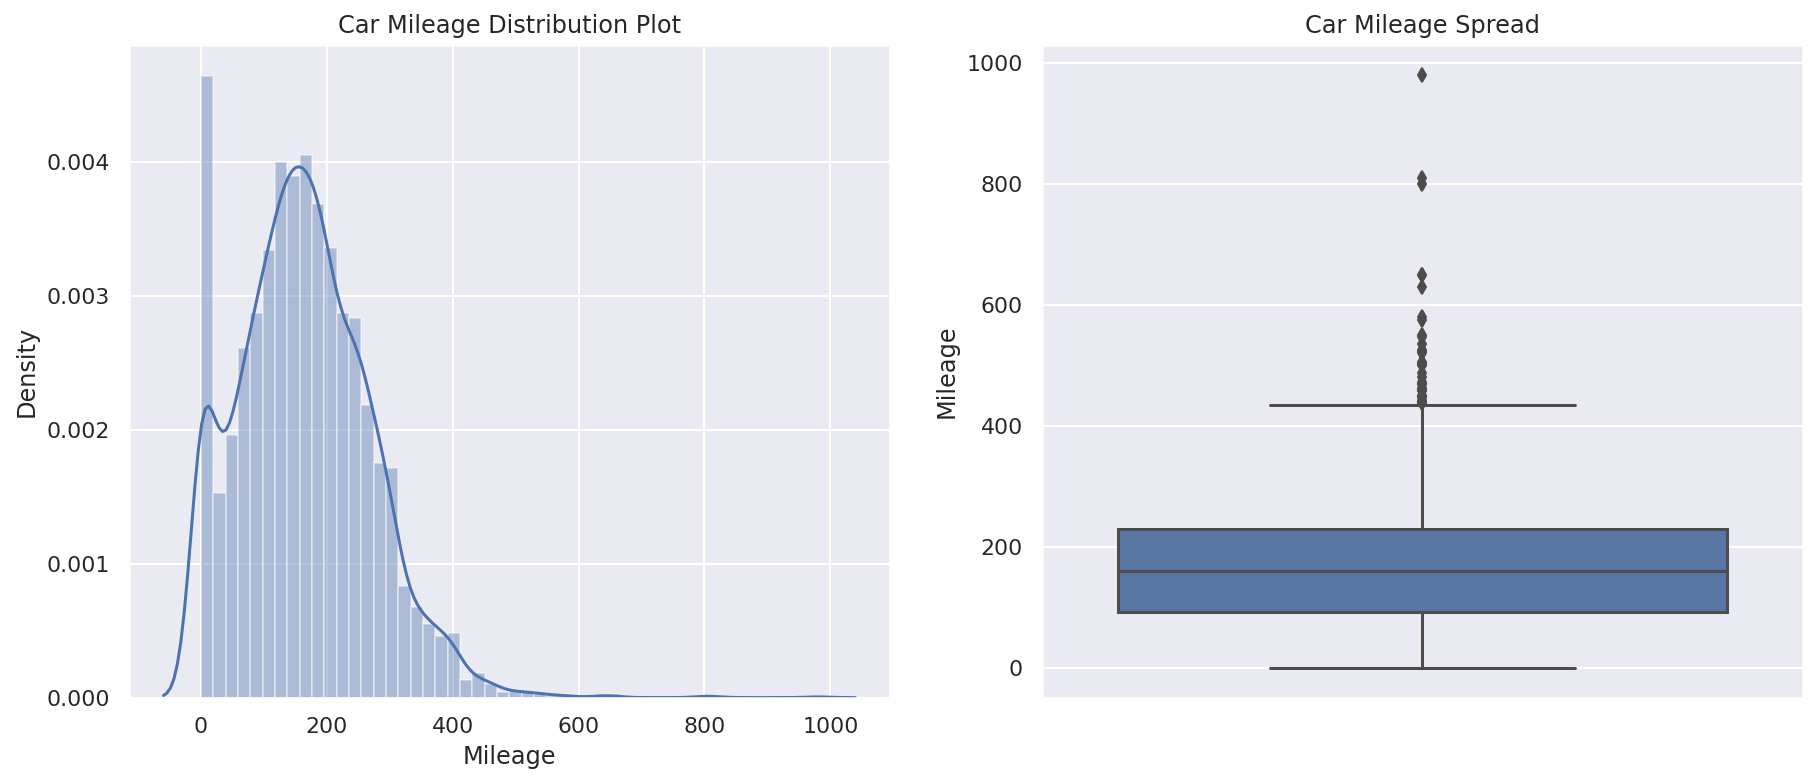

In [86]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Car Mileage Distribution Plot')
sns.distplot(df_c.Mileage)

plt.subplot(1,2,2)
plt.title('Car Mileage Spread')
sns.boxplot(y=df_c.Mileage)

plt.show()

- The Mileage Variable have positively skewed distribution.
- There is also an outliers value on the Mileage.

### Engine Capacity

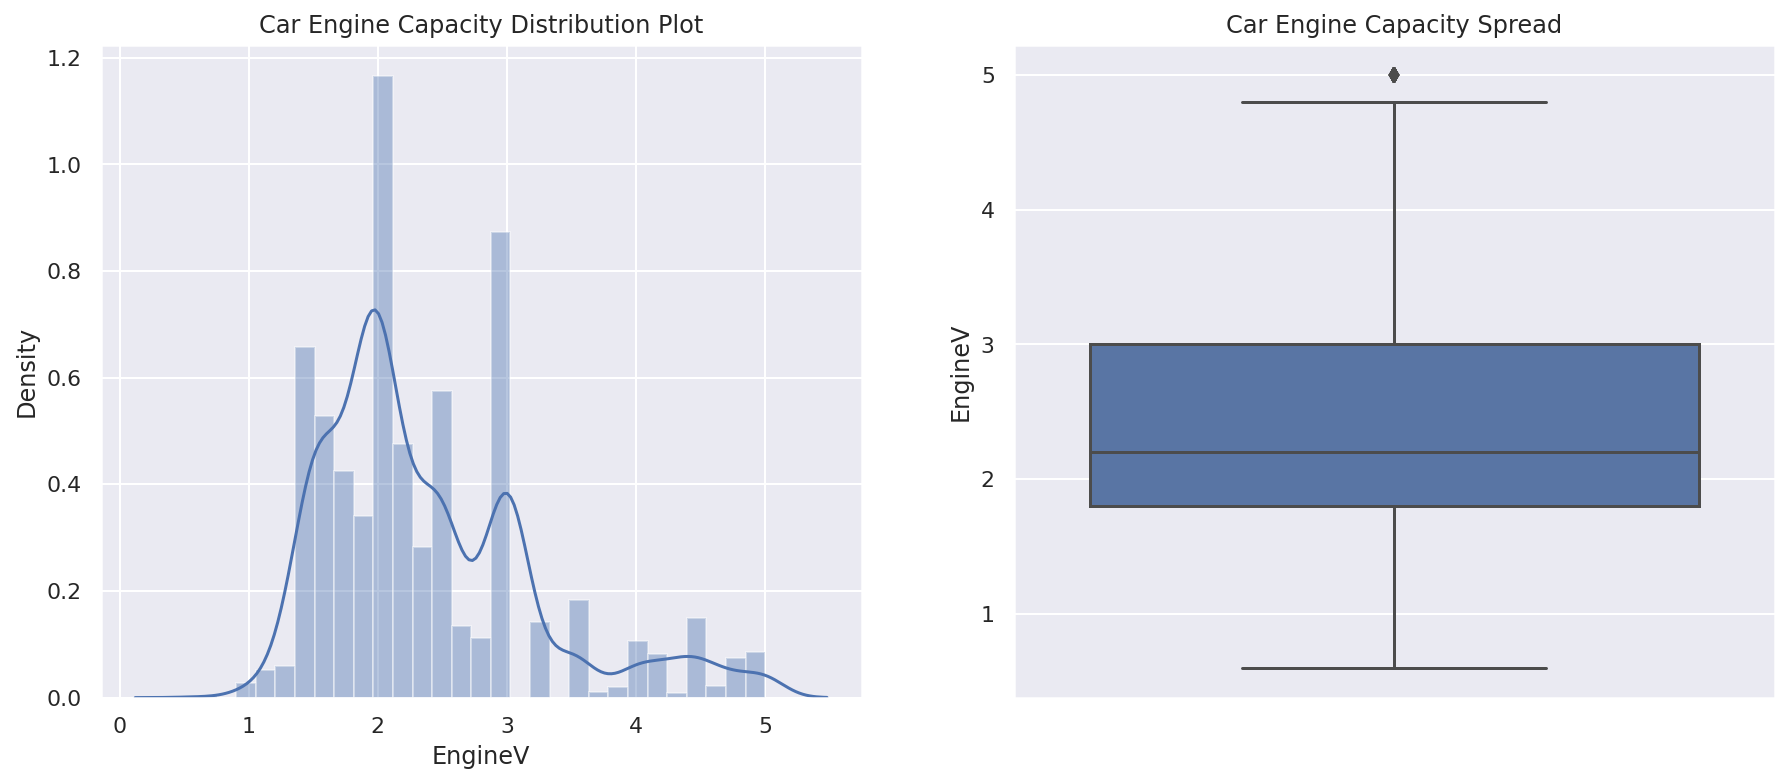

In [87]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Car Engine Capacity Distribution Plot')
sns.distplot(df_c.EngineV)

plt.subplot(1,2,2)
plt.title('Car Engine Capacity Spread')
sns.boxplot(y=df_c.EngineV)

plt.show()

- The Mileage Variable have positively skewed distribution.
- There is also an outliers value on the Mileage, but the count is very little.

### Year

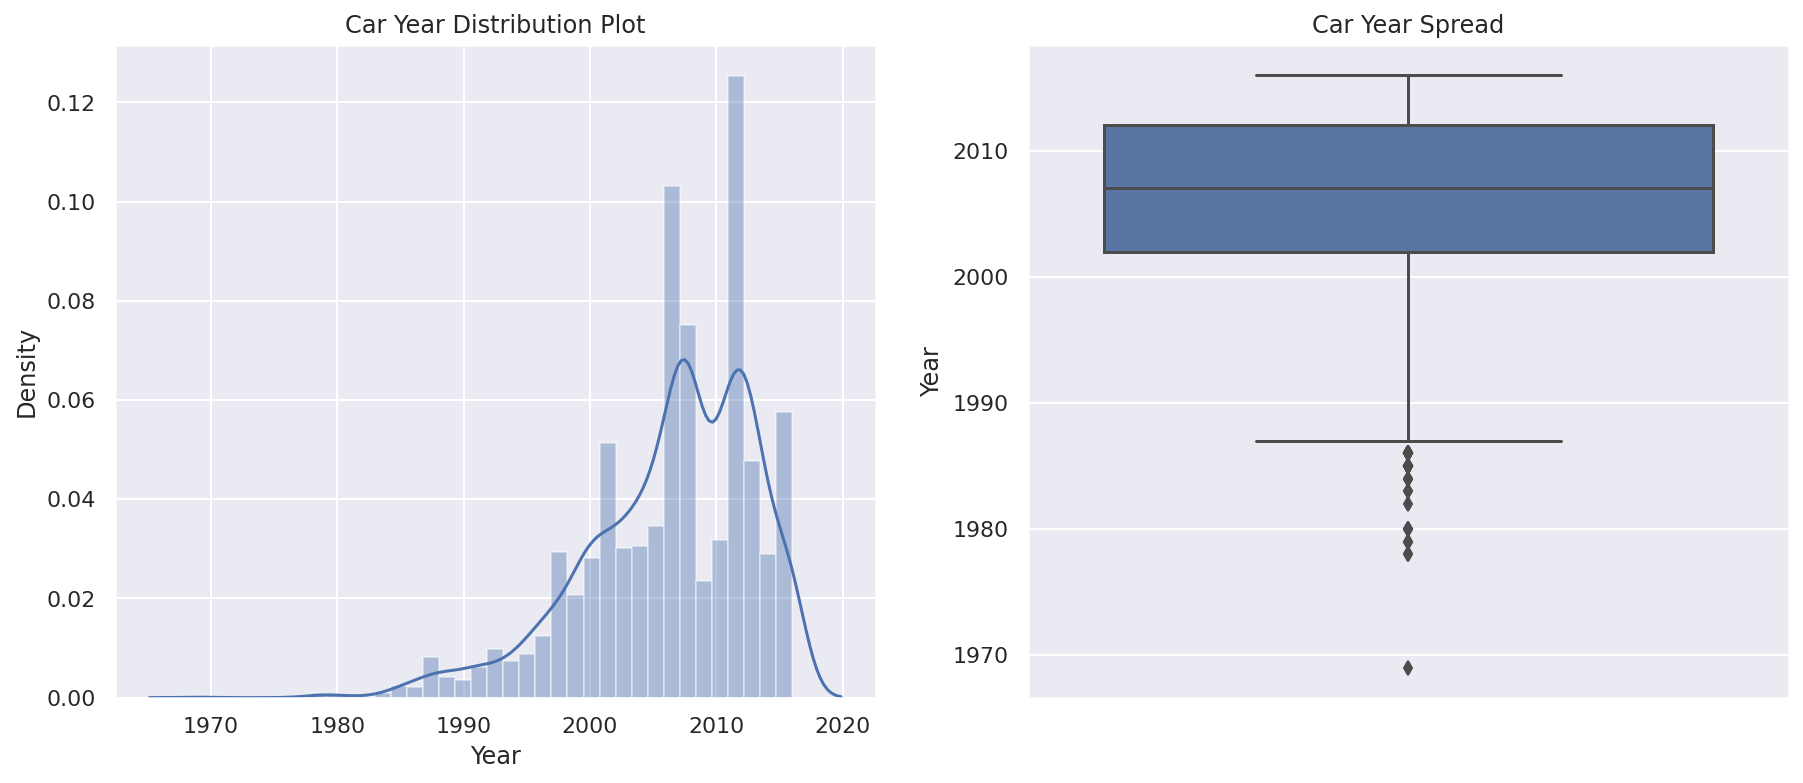

In [88]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Car Year Distribution Plot')
sns.distplot(df_c.Year)

plt.subplot(1,2,2)
plt.title('Car Year Spread')
sns.boxplot(y=df_c.Year)

plt.show()

- The Year Variable have positively skewed distribution.
- There is also an outliers value on the Year, but the count is very little.

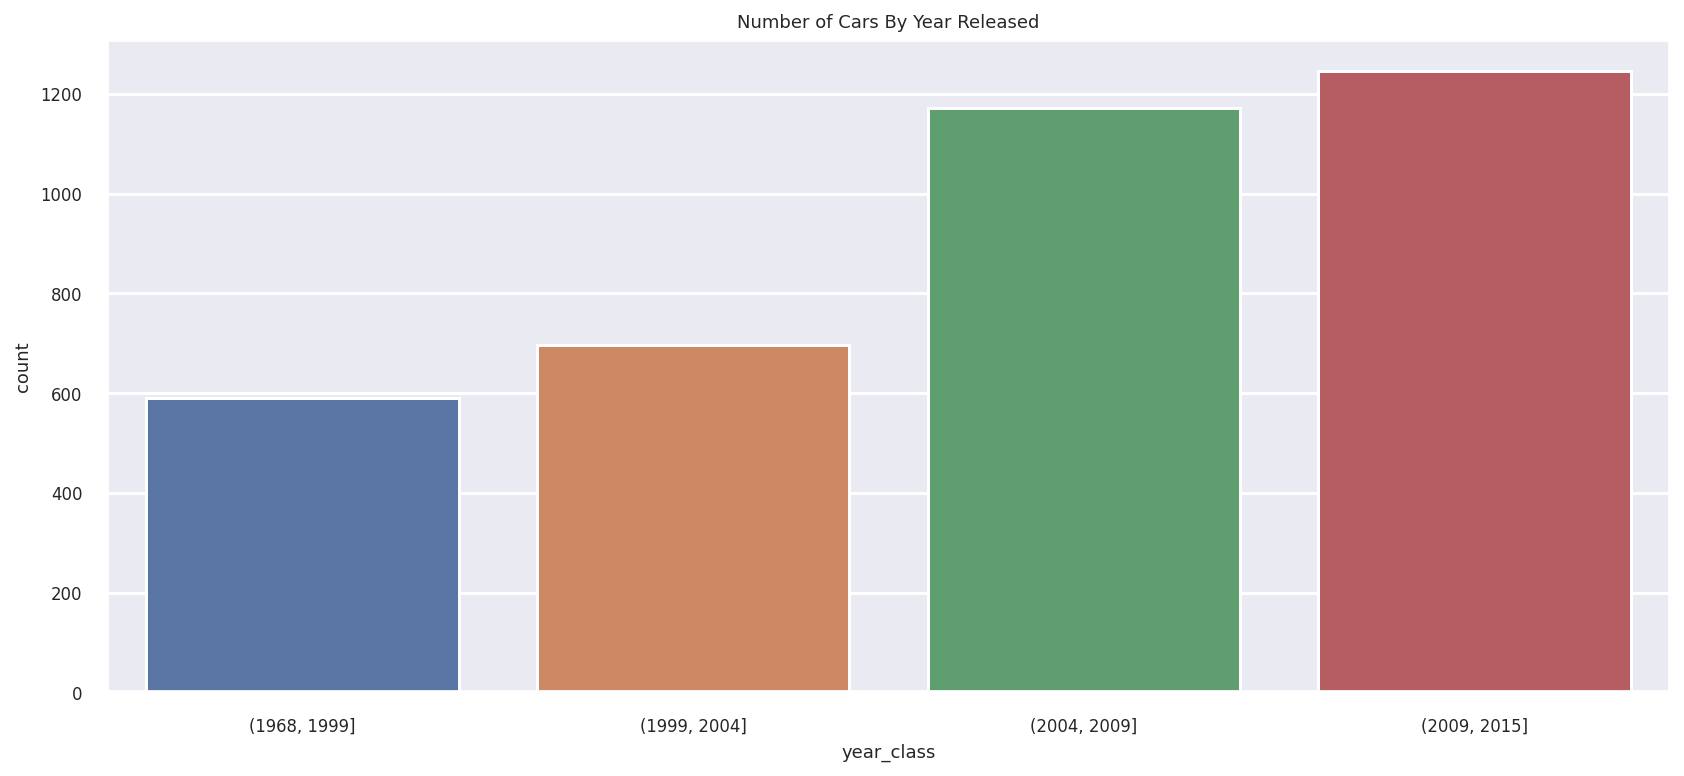

In [89]:
df_year=df_c[['Year']]
bins = [1968,1999,2004,2009,2015]
df_year['year_class'] = pd.cut(df_year['Year'], bins)
sns.set(rc={'figure.figsize':(14,6)})
sns.set_context("talk", font_scale=0.5)

gen = sns.countplot(x='year_class', data=df_year)
plt.title("Number of Cars By Year Released")
plt.show()

- Most of the cars are released on around >2005 - <2009 and > 2009 - <2015

## Relation Between Categorical Variables

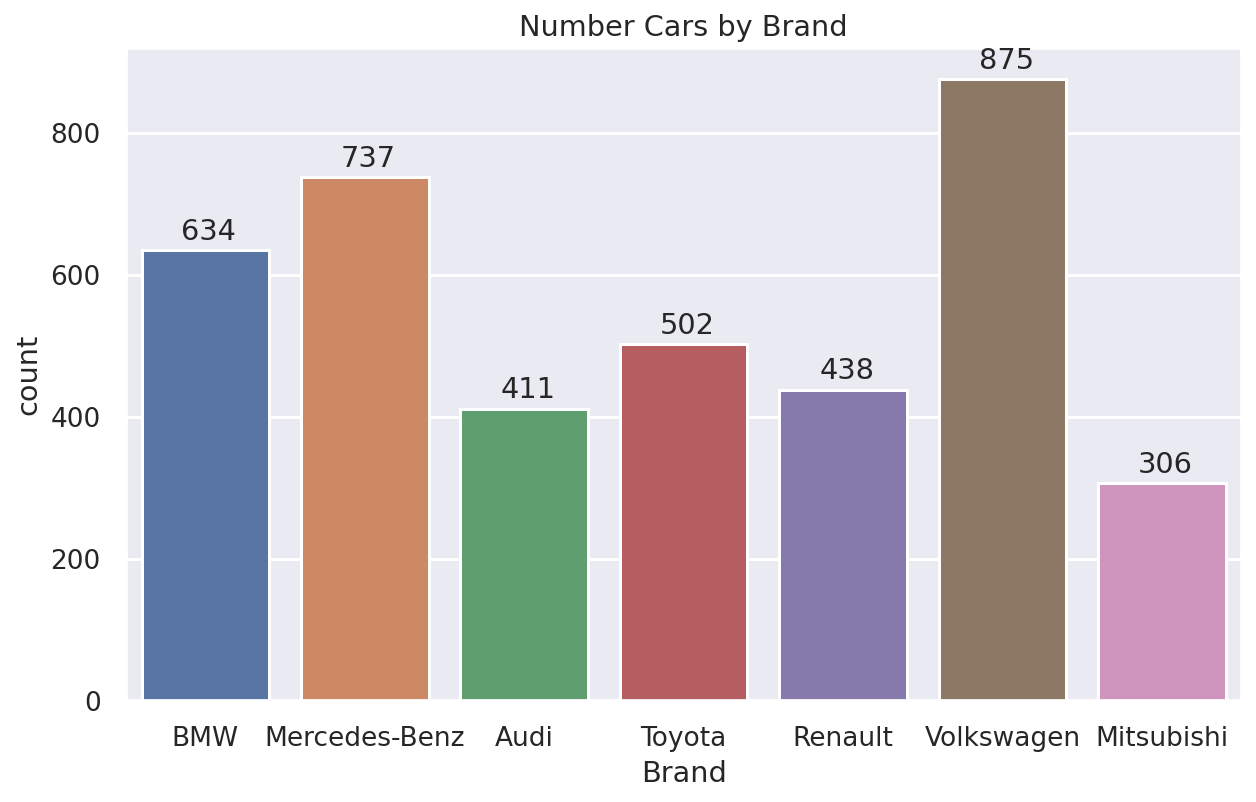

In [90]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_context("talk", font_scale=0.8)

gen = sns.countplot(x='Brand',data=df_c)
plt.title("Number Cars by Brand")
for p in gen.patches:
        gen.annotate('{:1}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+15))
plt.show()

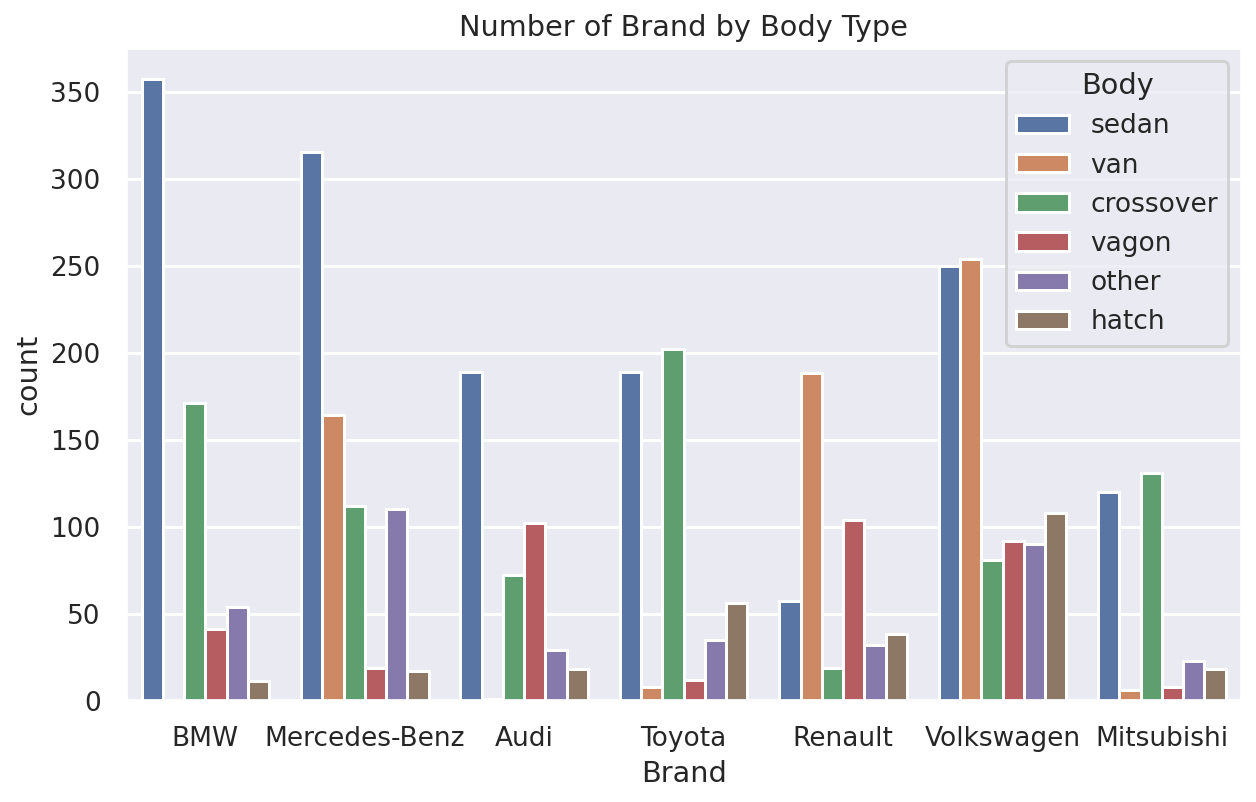

In [91]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_context("talk", font_scale=0.8)

gen = sns.countplot(x='Brand', hue='Body', data=df_c)
plt.title("Number of Brand by Body Type")
plt.show()

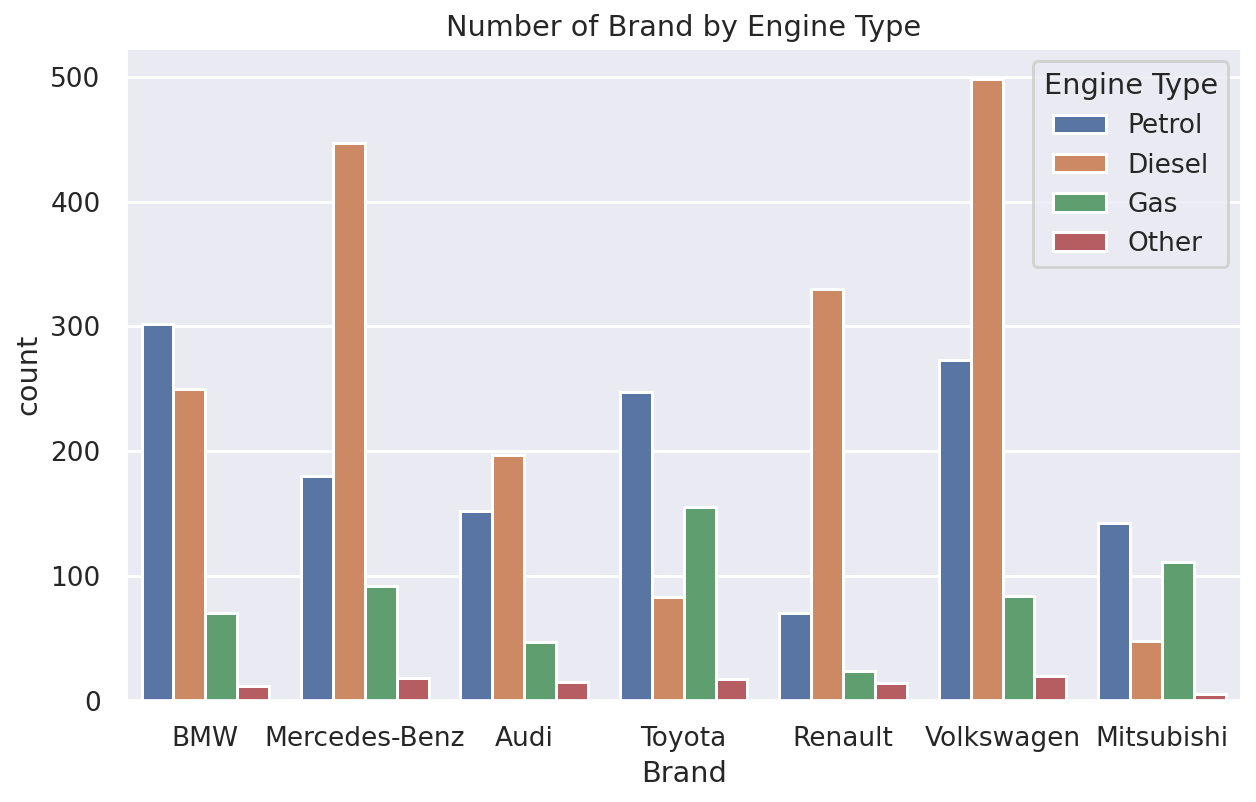

In [92]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_context("talk", font_scale=0.8)

gen = sns.countplot(x='Brand', hue='Engine Type', data=df_c)
plt.title("Number of Brand by Engine Type")
plt.show()

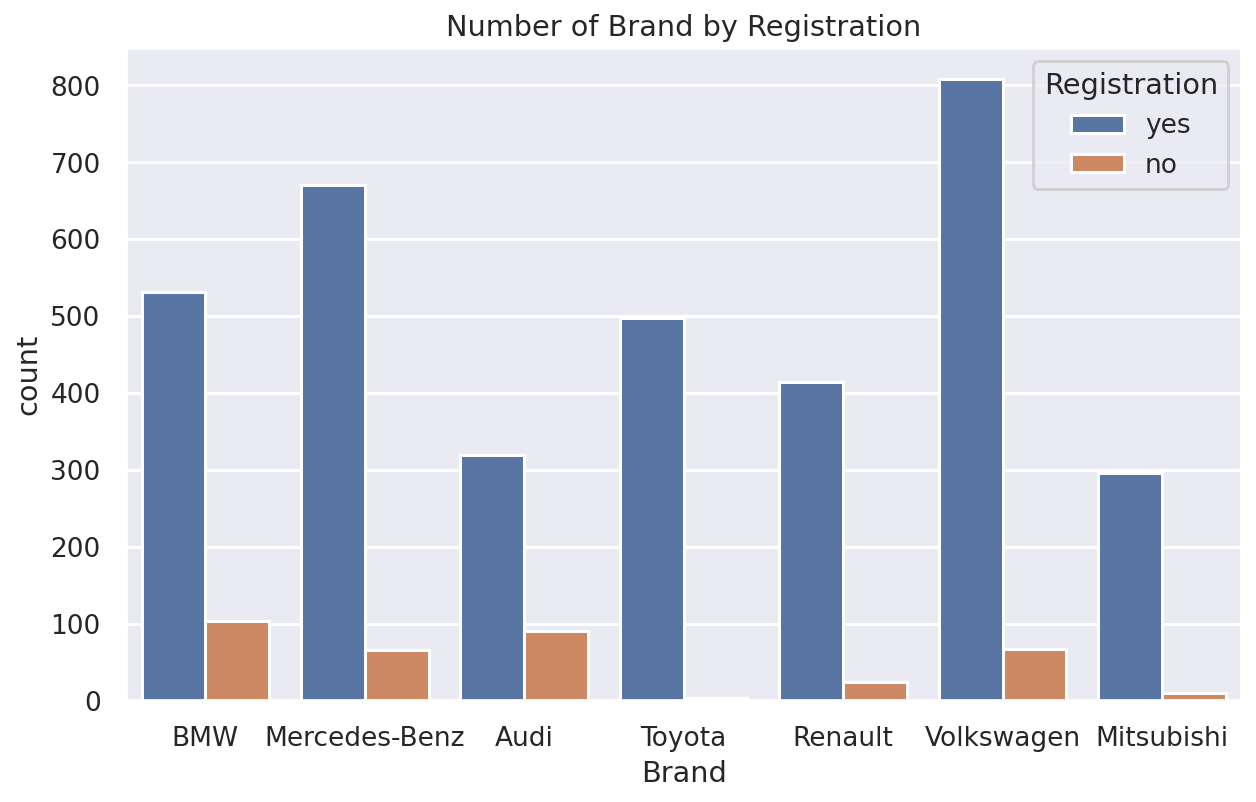

In [93]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_context("talk", font_scale=0.8)

gen = sns.countplot(x='Brand', hue='Registration', data=df_c)
plt.title("Number of Brand by Registration")
plt.show()

# Set Up Dummies for Categorical Variables

In [94]:
df_cc = pd.get_dummies(df_c, prefix=None, prefix_sep= '_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)
df_cc

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,35,1.6,2014,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,125000.0,9,3.0,2014,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,6500.0,1,3.5,1999,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4342,8000.0,194,2.0,1985,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


# Set Up Target and Predictors

Since our target variables (`Price`) is extremely have positive skew, we will need to transform it by using logarithmic.

In [95]:
X = df_cc.loc[:, df_cc.columns != 'Price']
y = np.log(df_cc['Price'])

# Data Splitting


We will going to split our dataframe (`df_cc`) into training and testing. We will split the dataframe with the composition 60% training data and 40% testing data.

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

# Scaling Dataset

Since the scale of the predictor variables is pretty much different among each other, therefore, we will neeed to apply scaling treatment on them.

In [98]:
#define scaler
scale=StandardScaler()

In [99]:
#fit transform xtrain and fit xtest
xtrain_scaled=scale.fit_transform(X_train) #Xtrain data
xtest_scaled=scale.transform(X_test) #Xtest data

# Modelling by LM (sklearn)

In [100]:
#define lm model
lm = LinearRegression()

#fit data to model
lm.fit(xtrain_scaled, y_train)

LinearRegression()

In [101]:
# print the intercept
print(lm.intercept_)

9.379913423930763


In [102]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Mileage,-0.115566
EngineV,0.218461
Year,0.545401
Brand_BMW,0.032213
Brand_Mercedes-Benz,0.017494
Brand_Mitsubishi,-0.118060
Brand_Renault,-0.185927
Brand_Toyota,-0.071310
Brand_Volkswagen,-0.100976
Body_hatch,-0.083255


**Interpretation of Coefficients:**

Continuous Variables (numerical):
- Positive weight: when a feature increases, then the `Price` variable also increases
- Negative weight: when a feature increases, then the `Price` variable will decreases

Dummy Variables (categorical):
- Positive weight: the respective category (for example, `Body` variable) is more expensive than the benchmark (in this case, `crossover`), vice versa
- Negative weight: the respective category (for example, `Brand` variable) is less expensive than the benchmark (in this case, `Audi`), vice versa

And the Benchmark for Dummy Variables are:

- `Brand` : Audi
- `Body` : crossover
- `Engine Type` : Diesel
- `Registration` : No

## Prediction

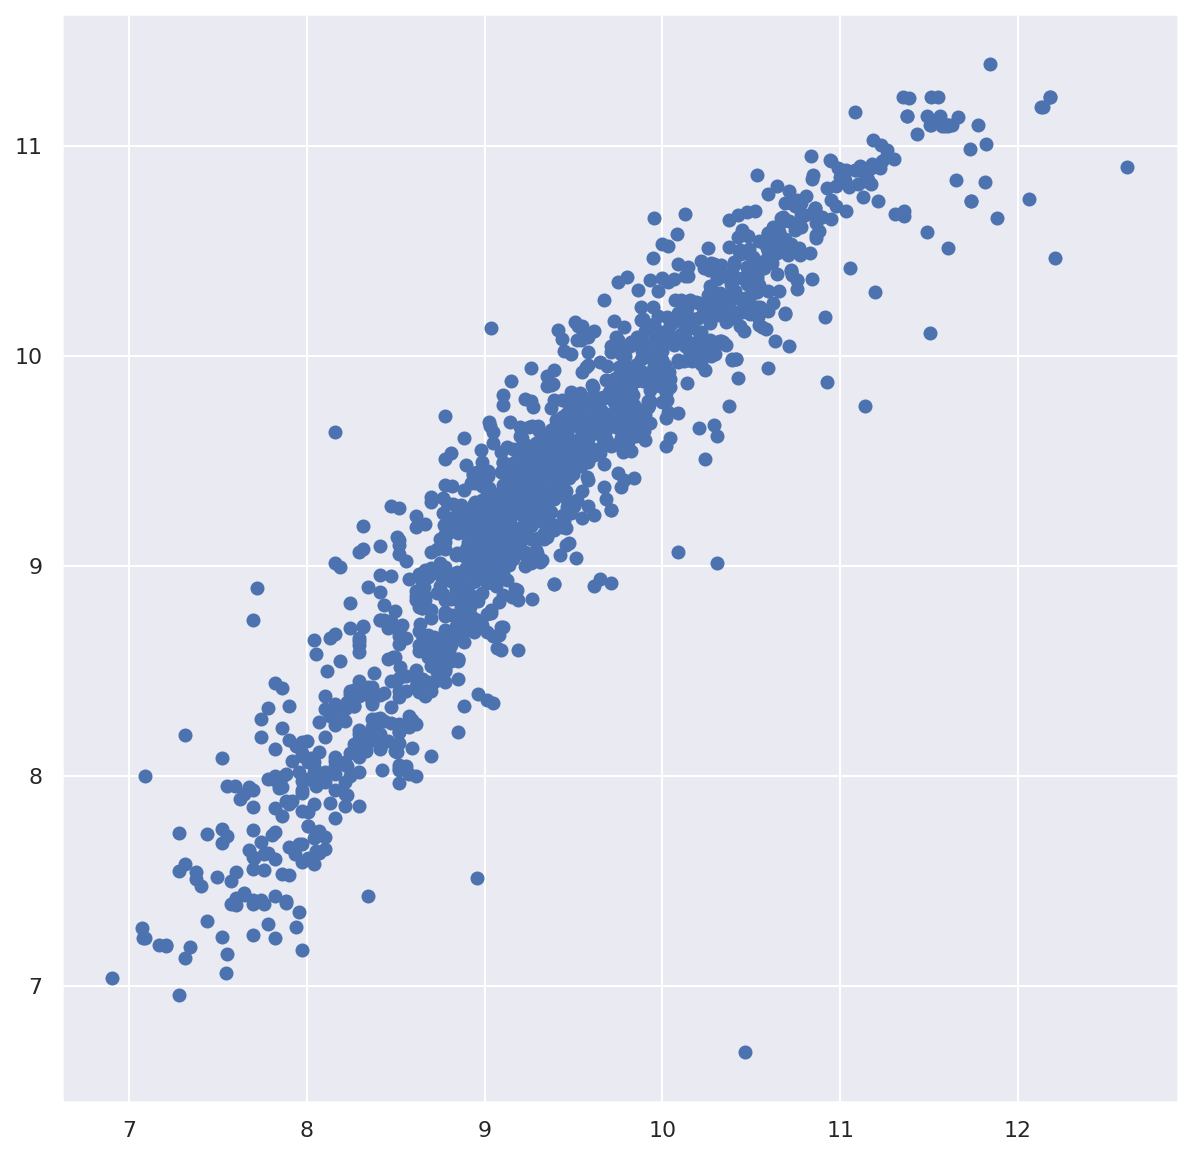

In [103]:
sns.set(rc={'figure.figsize':(10,10)})
#Set the Prediction to Test Data
y_pred = lm.predict(xtest_scaled)

#Plot The Prediction Result
plt.scatter(y_test,y_pred)

The prediction results seem promising, showed by the strong correlation between prediction result and the test data.

## Error Evaluation

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

#Rsquared
print('Rsquared:', r2_score(y_test, y_pred))

MAE: 0.22814840090809013
MSE: 0.10382353398318288
RMSE: 0.32221659482897974
MAPE: 0.024473225305005238
Rsquared: 0.8764966929360541


The results from error evaluation also looks promising, especially on the Rsquared value, indicating all of the predictor variables able to explain 88% of the target variable.

# Modelling by OLS (statsmodel)

Next, we will try to use `ols` from `statsmodel` package to predict the `Yearly Amount Spent`. 

## Train Data

In [105]:
x1 = sm.add_constant(xtrain_scaled)
results = sm.OLS(y_train, x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     926.3
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:35:20   Log-Likelihood:                -625.69
No. Observations:                2341   AIC:                             1289.
Df Residuals:                    2322   BIC:                             1399.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3799      0.007   1429.855      0.000       9.367       9.393
x1            -0.1156      0.009    -12.489      0.000      -0.134      -0.097
x2             0.2185      0.009     25.589      0.000       0.202       0.235
x3             0.5454      0.009     59.012      0.000       0.527       0.564
x4             0.0322      0.010      3.321      0.001       0.013       0.051
x5             0.0175      0.010      1.727      0.084      -0.002       0.037
x6            -0.1181      0.009    -13.790      0.000      -0.135      -0.101
x7            -0.1859      0.010    -19.276      0.000      -0.205      -0.167
x8            -0.0713      0.010     -7.403      0.000      -0.090      -0.052
x9            -0.1010      0.011     -9.227      0.000      -0.122      -0.080
x10           -0.0833      0.009     -9.620      0.000      -0.100      -0.066
x11           -0.0710      0.008     -8.700      0.000      -0.087      -0.055
x12           -0.1286      0.010    -12.390      0.000      -0.149      -0.108
x13           -0.0958      0.009    -10.921      0.000      -0.113      -0.079
x14           -0.1399      0.010    -13.963      0.000      -0.160      -0.120
x15           -0.0497      0.008     -6.241      0.000      -0.065      -0.034
x16           -0.0155      0.007     -2.297      0.022      -0.029      -0.002
x17           -0.0554      0.008     -6.662      0.000      -0.072      -0.039
x18            0.2637      0.007     37.043      0.000       0.250       0.278
==============================================================================
Omnibus:                      208.047   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1355.647
Skew:                          -0.041   Prob(JB):                    4.22e-295
Kurtosis:                       6.727   Cond. No.                         4.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

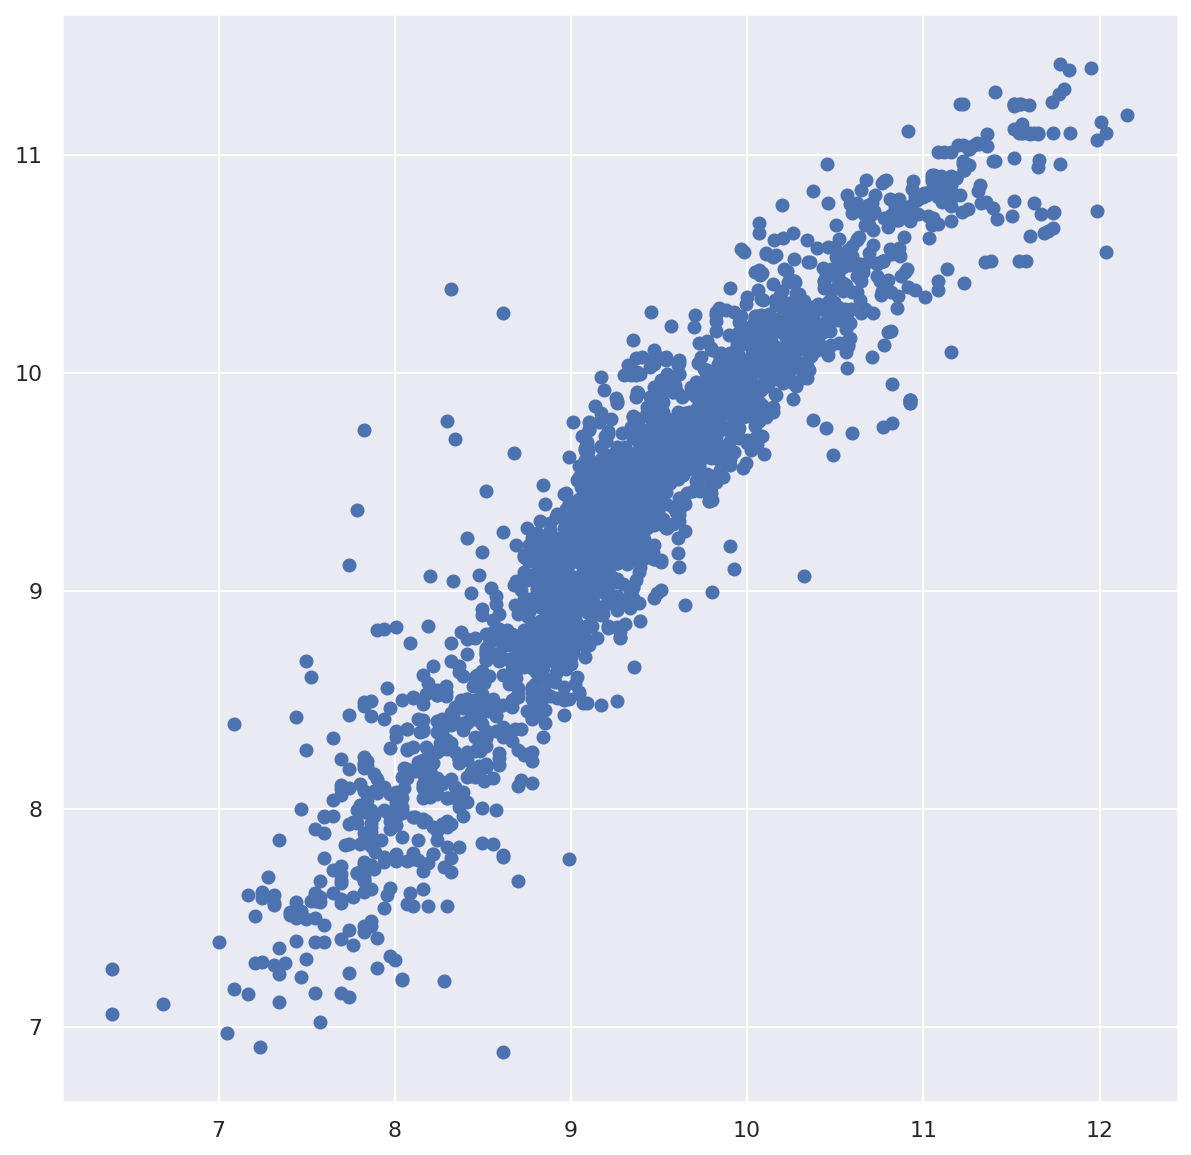

In [106]:
#Set the Prediction to Test Data
y_pred_ols = results.predict(x1)

#Plot The Prediction Result
plt.scatter(y_train, y_pred_ols)

The plot from prediction of Train Data seems good, because showing strong correlation.

## Test Data

In [107]:
x2=sm.add_constant(xtest_scaled)
results2 = sm.OLS(y_test,x2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     624.5
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:35:24   Log-Likelihood:                -429.43
No. Observations:                1562   AIC:                             896.9
Df Residuals:                    1543   BIC:                             998.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3811      0.008   1147.160      0.000       9.365       9.397
x1            -0.1242      0.012    -10.408      0.000      -0.148      -0.101
x2             0.2241      0.011     21.010      0.000       0.203       0.245
x3             0.5286      0.012     43.480      0.000       0.505       0.552
x4             0.0185      0.012      1.526      0.127      -0.005       0.042
x5             0.0282      0.013      2.223      0.026       0.003       0.053
x6            -0.1269      0.010    -12.278      0.000      -0.147      -0.107
x7            -0.1955      0.012    -16.504      0.000      -0.219      -0.172
x8            -0.0719      0.012     -5.921      0.000      -0.096      -0.048
x9            -0.0859      0.014     -6.123      0.000      -0.113      -0.058
x10           -0.1027      0.011     -9.163      0.000      -0.125      -0.081
x11           -0.0707      0.010     -6.970      0.000      -0.091      -0.051
x12           -0.1529      0.013    -12.032      0.000      -0.178      -0.128
x13           -0.0887      0.011     -8.311      0.000      -0.110      -0.068
x14           -0.1724      0.012    -14.125      0.000      -0.196      -0.148
x15           -0.0481      0.010     -4.816      0.000      -0.068      -0.029
x16           -0.0164      0.008     -2.019      0.044      -0.032      -0.000
x17           -0.0497      0.011     -4.683      0.000      -0.071      -0.029
x18            0.2523      0.009     29.369      0.000       0.235       0.269
==============================================================================
Omnibus:                      622.369   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12259.869
Skew:                           1.362   Prob(JB):                         0.00
Kurtosis:                      16.452   Cond. No.                         4.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

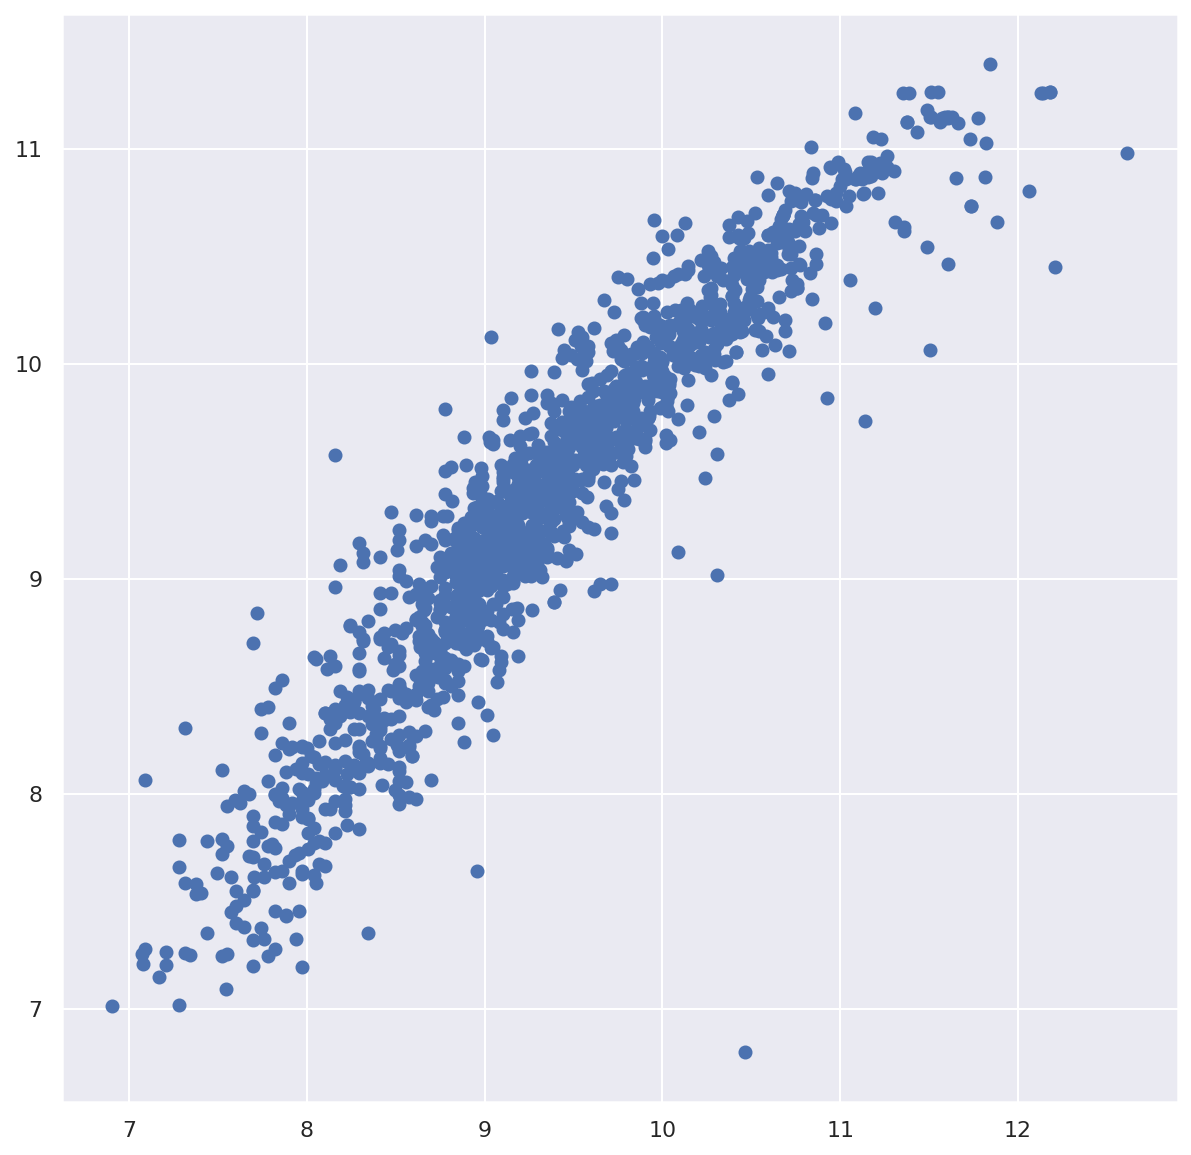

In [108]:
#Set the Prediction to Test Data
y_pred_ols1 = results2.predict(x2)

#Plot The Prediction Result
plt.scatter(y_test, y_pred_ols1)

Similar like the Train Data, the prediction result of Test Data also showing a strong correlation, which indicates a very good prediction.

## Error Evaluation

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_ols1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_ols1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ols1)))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_ols1))

#Rsquared
print('Rsquared:', r2_score(y_test, y_pred_ols1))

MAE: 0.2243998777134474
MSE: 0.10146573576032641
RMSE: 0.3185368671917372
MAPE: 0.024061861819791534
Rsquared: 0.8793014123165314


The Error Evaluation are showing similar results with the linear regression by sklearn package. From the Rsquared value, we can conclude that the predictive variables used in OLS model are able to explain 88% the `Price` variable.

# Checking on Assumptions

In [110]:
# Set Up Function to Calculate Residuals
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

## Assumption 1: Linear Relationship between the Target and the Feature

In [111]:
# Set Up function to Plot Linear Relationship
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


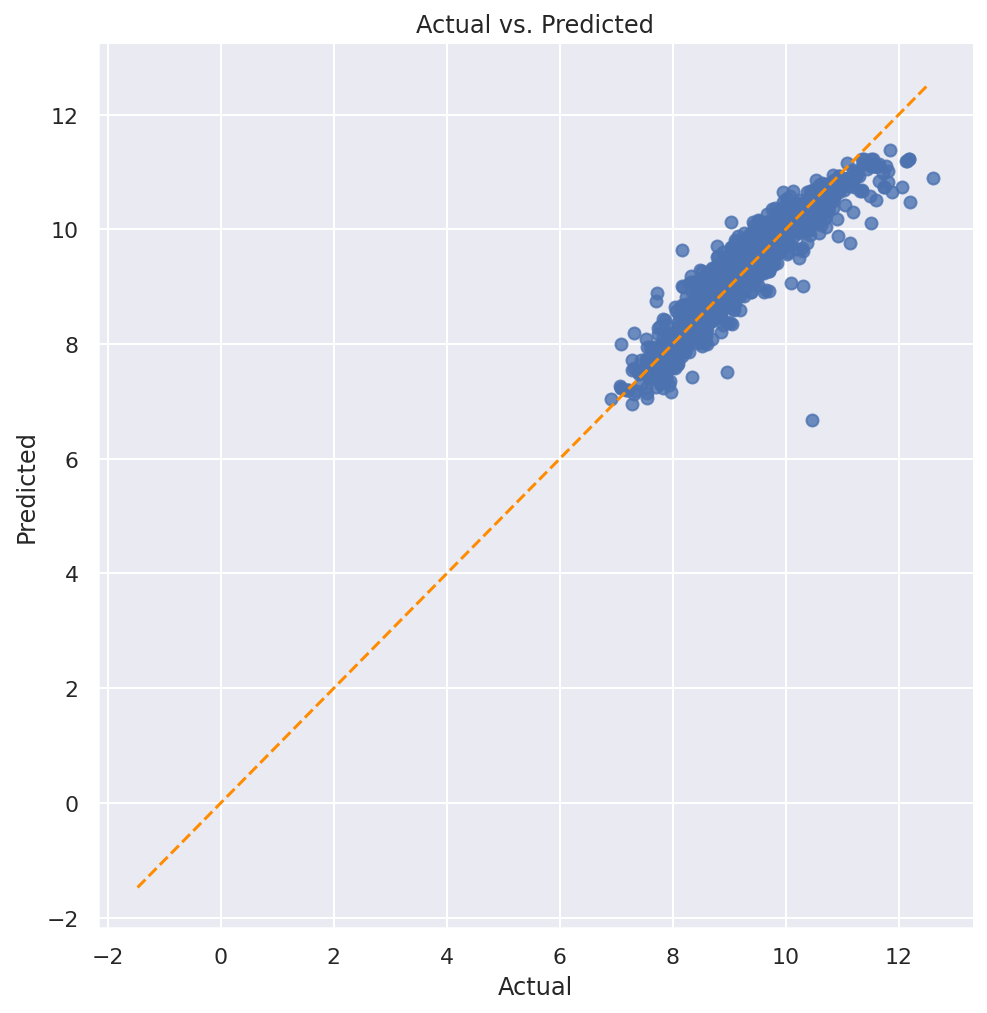

In [112]:
linear_assumption(lm, xtest_scaled, y_test)

Most of the predicted results are showing linear relationship with the Actual. But our prediction are biased towards in higher values. It may be happened because there are outliers with significant values on the higher car price.

## Assumption 2: Residuals are Normally Distributed 

In [113]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')


Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


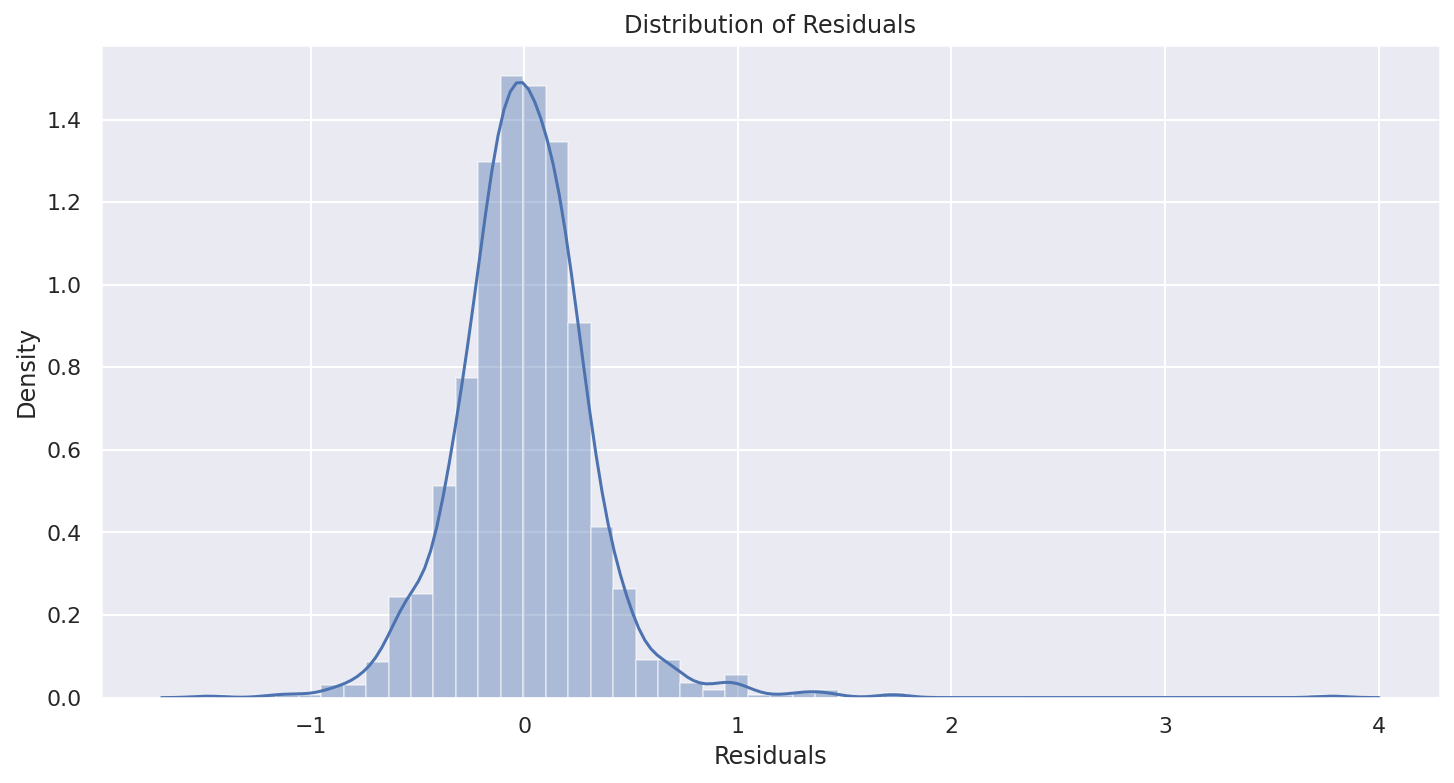


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [114]:
normal_errors_assumption(lm, xtest_scaled, y_test)

Based on visualization, the residuals seem following the normal distribution. Unfortunately, the p-value from the test is lower than the threshold. Which means there are still some bias in our predictions. The problem seems occured because of the outliers in high price. 

But considering that based on visualization alone the distribution seems still in a reasonable normal distribution, we will keep moving forward.

## Assumption 3: No Multicollinearity Issues Among Predictors

In [115]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (15,15))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True, annot_kws={"size":9})
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')


In [116]:
linear_feature_names = list(X.columns.values)

Assumption 3: Little to no multicollinearity among predictors


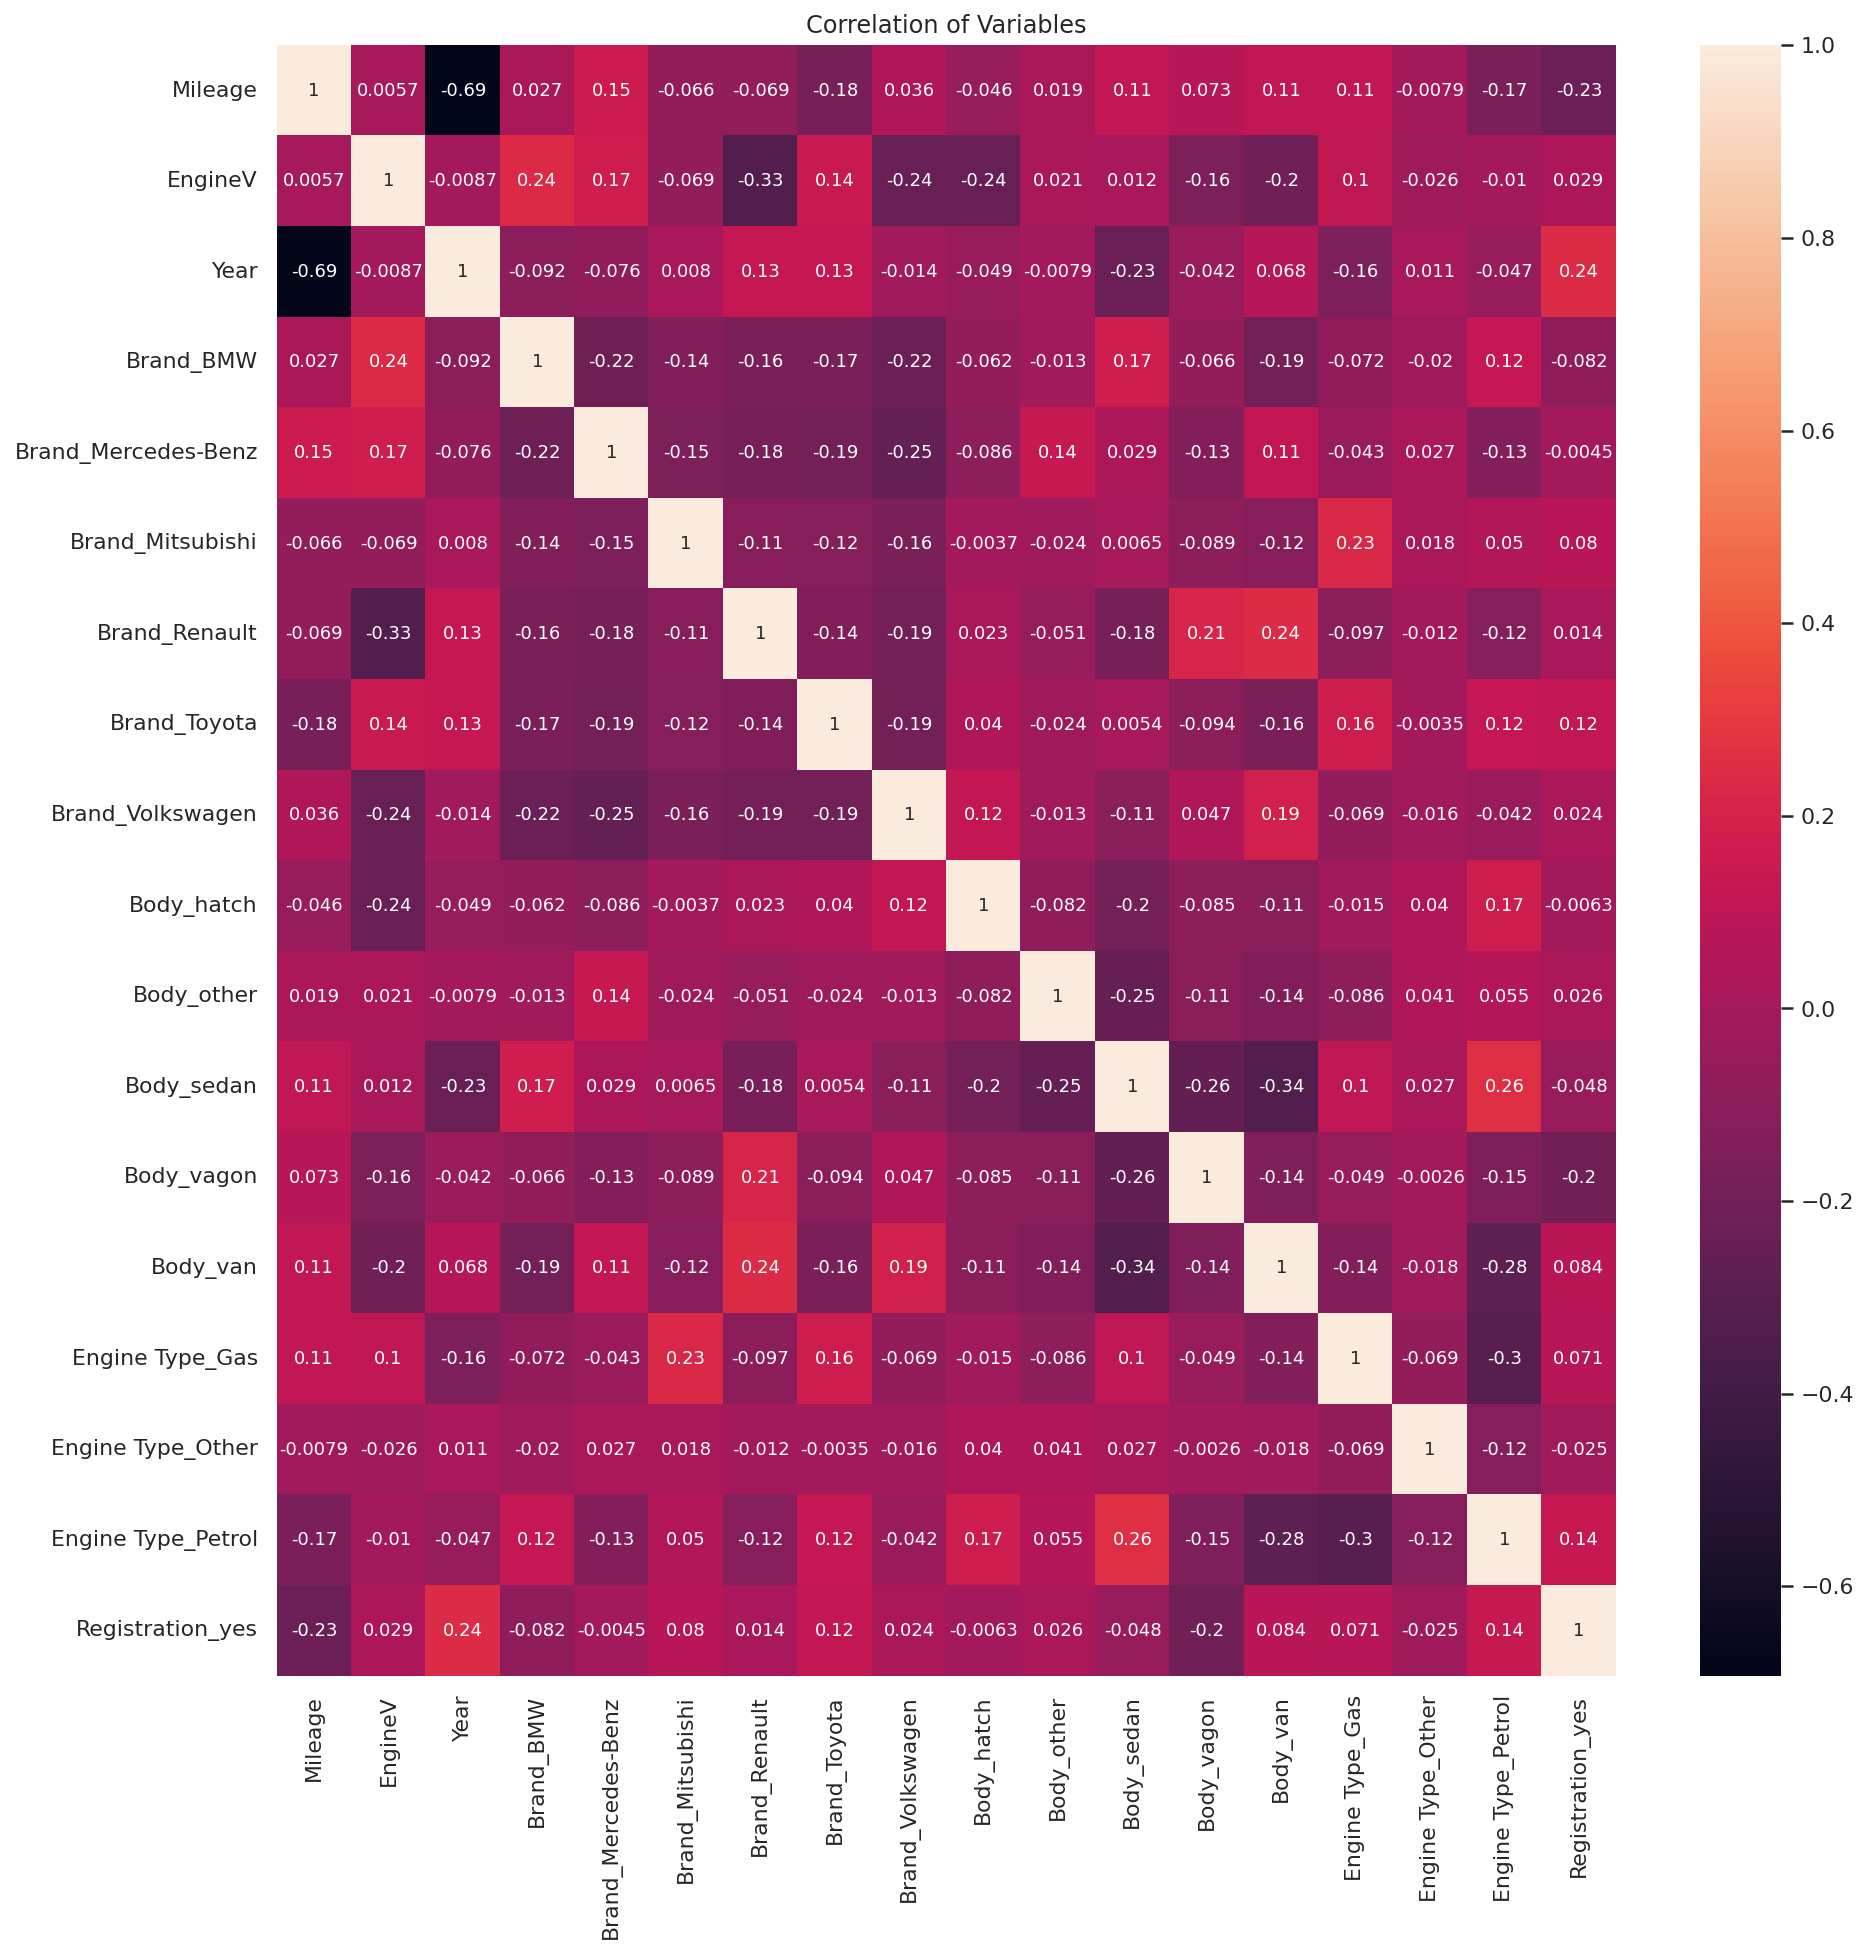

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Mileage: 2.2159660118890945
EngineV: 1.6350823914343005
Year: 2.2888984961961425
Brand_BMW: 2.259938008279618
Brand_Mercedes-Benz: 2.581012768054025
Brand_Mitsubishi: 1.9655172641353955
Brand_Renault: 2.311522559277657
Brand_Toyota: 2.1818017919708117
Brand_Volkswagen: 2.7193120734487612
Body_hatch: 1.6096707734574311
Body_other: 1.5419864848582325
Body_sedan: 2.433678300164038
Body_vagon: 1.8152620863981805
Body_van: 2.2573024951419693
Engine Type_Gas: 1.4973746169937345
Engine Type_Other: 1.063343603244545
Engine Type_Petrol: 1.6948366914243305
Registration_yes: 1.203900519490393

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [117]:
multicollinearity_assumption(lm, xtest_scaled, y_test, linear_feature_names)

## Assumption 4: No Autocorrelation Issues

In [118]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')


In [119]:
autocorrelation_assumption(lm, xtest_scaled, y_test)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.068122240104236
Little to no autocorrelation 

Assumption satisfied


There is no autocorrelation issue.  It may indicates that we are not missing any important information that should be captured by the model.

## Assumption 5: Homoscedasticity

In [120]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


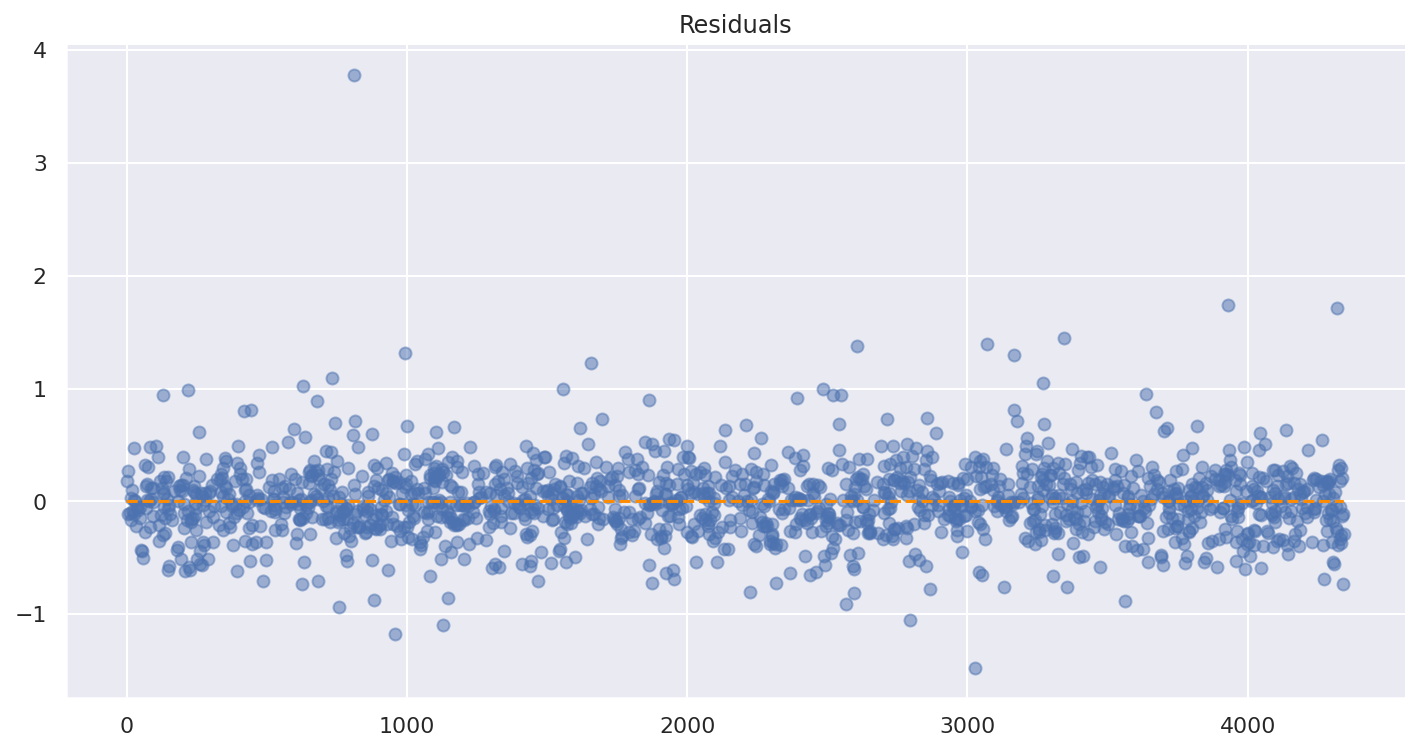

In [121]:
homoscedasticity_assumption(lm, xtest_scaled, y_test)


Based on the visualization, we can see a quite uniform variance across our residuals. All residuals seems spread evenly in upper and lower section. So we can assume that there is no problem in Homoscedasticity.

# Summary

From The Scikit Learn Linear Regression Model, the results are:

- The Measurement Metrics MAE(0.23), MSE(0.109), RMSE(0,33), MAPE(0.024) score are relatively low, 
this means our models does not have much difference between predicted and actal value.
- While the R Squared value is relatively high (0.87), this means that our model able to explain 87% of the Target Variable.

While from the OLS Stats Model, the summary are:

- The Measurement Metrics MAE(0.22), MSE(0.101), RMSE(0,31), MAPE(0.024) score are relatively low, 
this means our models does not have much difference between predicted and actal value.
- While the R Squared value is relatively high (0.88), this means that our model able to explain 87% of the Target Variable.
- This model does not have much difference in overall compared to SK - Learn Linear Regression.


From our SK Learn Model Coefficient, we can conclude some important features for the Price:

In [122]:
# view coefficients by Descending
coeff_df.sort_values(['Coefficient'], ascending=False)

,Coefficient
Year,0.545401
Registration_yes,0.263725
EngineV,0.218461
Brand_BMW,0.032213
Brand_Mercedes-Benz,0.017494
Engine Type_Other,-0.015497
Engine Type_Gas,-0.049700
Engine Type_Petrol,-0.055376
Body_other,-0.070970
Brand_Toyota,-0.071310


- Registration_yes: Registered car will have a huge impact on the car price, since people does not want to be ticketed when driving a car.
- Year: Year have a relatively huge impact on the car, because it describes the car Age, the bigger the year, the younger the car Age.
- EngineV: Explains the capability of the car Power, which will up the price.
- Brand BMW, Brand Mercedes Benz: This brand of car is known for its premium cars, and oftenly target high class market, this explains why the car is expensive.

The rest positive coefficients are relatively small, however, we will address some of the big Negative Coeffiecients:

- Brand Mitsubishi, Brand Renault: Theese 2 have negative coefficients, means that this 2 will put the price lower, we need to do more research on why this happens
- Body Hatch, Body Vagon, Body Van: Theese 3 body types will put the price lower, it seems that the market does not really want this type of Body Car. This too will need more research.

# For Further Researches:

In [123]:
#view data by Brand
df_brand=df_c.groupby(['Brand']).count()[['EngineV']].sort_values(by='EngineV', ascending=False)
df_brand

,EngineV
Brand,
Volkswagen,875
Mercedes-Benz,737
BMW,634
Toyota,502
Renault,438
Audi,411
Mitsubishi,306


- The Data used for the model are mostly dominated by Premium cars( Mercedes, BMW, VW, and Audi)
- Because of that, there is a tendency that this model will learn from thoose premium cars mostly, resulting thoose premium car price as a 'benchmark'
- For Example , The coeff for Mercedes Benz is Positive , while Toyota is Negative, this is logically true because Toyota price is lower than Mercedes usually.
- So for the next research we can do:

1. Add More Variety of Other Car Brands that is not Premium cars.
2. For the 'Model' columns that we drop, next if we wanted to try another method, we can use Principal Component Analysis to reduce the features while stile having a relatively good data.
3. Filter outliers data which may give biases to model, or try to use more advance modelling technique which more robust to outliers.
